In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
short_lookback = 5
long_lookback = 8

In [3]:
extract_obj = yf.Ticker("AAPL")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [4]:
#price_list - numpy array list
#lookback - integer
def mcg(price_array, lookback):
    out_array = np.array([None for i in range(lookback)])
    
    sum_var = np.sum(price_array[0:lookback])
    base_val = (sum_var/lookback)
    out_array = np.append(out_array,base_val)
    
    for i in range(price_array.size - lookback - 1):
        price_t = price_array[i + lookback + 1]
        add_val = (price_t - base_val)
        frac = (price_t/base_val)**4 
        denom = frac*lookback
        out_val = base_val + add_val/denom
        
        out_array = np.append(out_array,out_val)
        base_val = out_val
    return out_array


In [5]:
def sma(price_array, lookback):
    out_array = np.array([None for i in range(lookback)])
    for i in range(price_array.size - lookback):
        out_val = (np.sum(price_array[i:i+lookback])/lookback)
        out_array = np.append(out_array,out_val)
    return out_array

In [6]:
start = time.time()
x1 = sma(price_list,short_lookback)
x2 = mcg(price_list,long_lookback)
end = time.time()
print(x1)
function_time = end - start

[None None None None None 122.744 122.726 122.66599999999998
 122.09400000000001 121.43400000000001 121.248 121.282 121.09399999999998
 120.446 120.69800000000001 121.258 122.15799999999999 123.10999999999999
 124.55999999999999 126.054 127.774 129.078 130.544 131.724
 132.64600000000002 133.08599999999996 133.67999999999998 133.642 133.632
 133.25799999999998 133.224 133.204 133.434 133.64399999999998 134.01
 133.644 133.318 132.128 131.118 130.026 129.728 128.756 128.06
 126.98000000000002 126.276 125.624 125.30199999999999 125.41399999999999
 125.602 125.918]


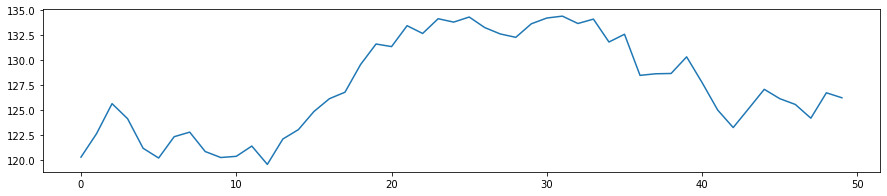

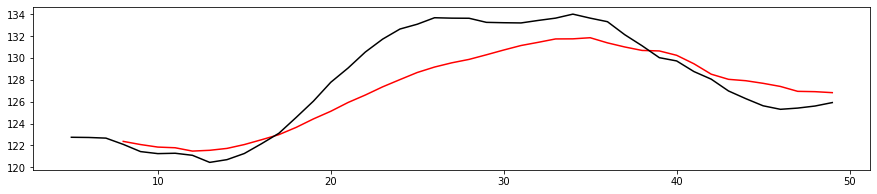

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()

In [8]:
def sma_mcg_osc_gen(price_array, short_lookback, long_lookback):
    out_array = np.array([None for i in range(long_lookback)])
    
    def sma(price_array, lookback):
        out_array = np.array([None for i in range(lookback)])
        for i in range(price_array.size - lookback):
            out_val = (np.sum(price_array[i:i+lookback])/lookback)
            out_array = np.append(out_array,out_val)
        return out_array
    
    def mcg(price_array, lookback):
        out_array = np.array([None for i in range(lookback)])

        sum_var = np.sum(price_array[0:lookback])
        base_val = (sum_var/lookback)
        out_array = np.append(out_array,base_val)

        for i in range(price_array.size - lookback - 1):
            price_t = price_array[i + lookback + 1]
            add_val = (price_t - base_val)
            frac = (price_t/base_val)**4 
            denom = frac*lookback
            out_val = base_val + add_val/denom

            out_array = np.append(out_array,out_val)
            base_val = out_val
        return out_array
    
    out_arr = np.subtract(sma(price_array, short_lookback)[long_lookback:], mcg(price_array, long_lookback)[long_lookback:])
    out_array = np.append(out_array,out_arr)
    return out_array

In [9]:
start = time.time()
osc = sma_mcg_osc_gen(price_array = price_list, short_lookback = short_lookback, long_lookback = long_lookback)
end = time.time()
print(osc)
oscillator_time = (end-start)

[None None None None None None None None -0.2734999999999985
 -0.6439238576317337 -0.5984588229537309 -0.5026706328009141
 -0.3855137097601471 -1.1059066527584775 -1.0276790408873495
 -0.8185355772310459 -0.3622020127905614 0.1263050133567276
 0.9105050910865202 1.6292145817502046 2.6521860733323592
 3.151700523325161 3.9335004176287924 4.365729166297655 4.625908272112781
 4.416086822378844 4.511386430713458 4.085150703675055 3.7619328884530603
 2.9676574363275563 2.4974986037378244 2.065497146764642
 2.0023588582331513 1.9035186394189338 2.260847127597941
 1.7923821849563808 1.9369119504128207 1.1226521529596027
 0.42923108069081195 -0.616148829457444 -0.5157801450772581
 -0.7117588422910899 -0.45593632703261733 -1.0649904919526136
 -1.6420041490122088 -2.0561605034228734 -2.0919262920214408
 -1.5318951463377886 -1.314188056896299 -0.9079222242345679]


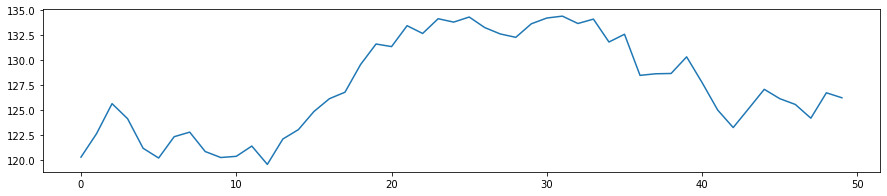

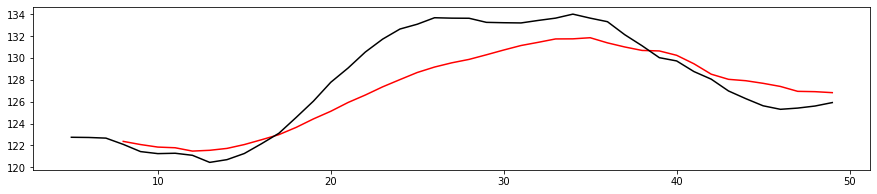

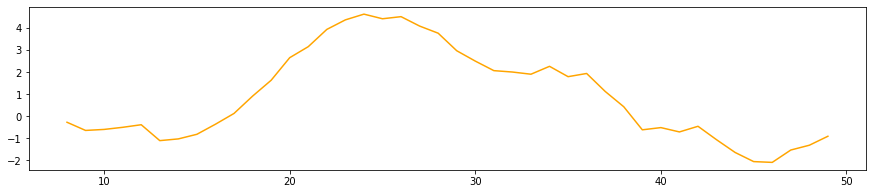

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(osc.size), osc, color = 'orange')
plt.show()

In [11]:
def signal_generation(oscillator_array, long_lookback):
    out_array = np.array([0 for i in range(long_lookback + 1)])
    start_val = long_lookback + 1
    for i in range(start_val, oscillator_array.size):
        append_val = 0
        if (oscillator_array[i] > 0 and oscillator_array[i - 1]  <= 0):
            append_val = oscillator_array[i] - oscillator_array[i - 1]
        elif (oscillator_array[i] < 0 and oscillator_array[i - 1]  >= 0):
            append_val = oscillator_array[i] - oscillator_array[i - 1]
        out_array = np.append(out_array, append_val)
    return out_array

In [12]:
start = time.time()
sign_gen = signal_generation(oscillator_array = osc, long_lookback = long_lookback)
end = time.time()
print(sign_gen)
signal_time = end - start

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.48850703
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -1.04537991  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


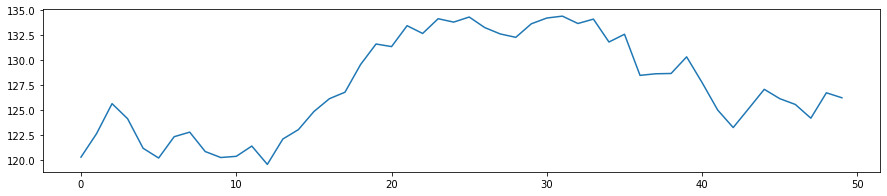

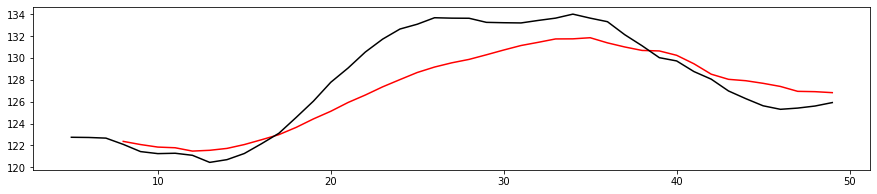

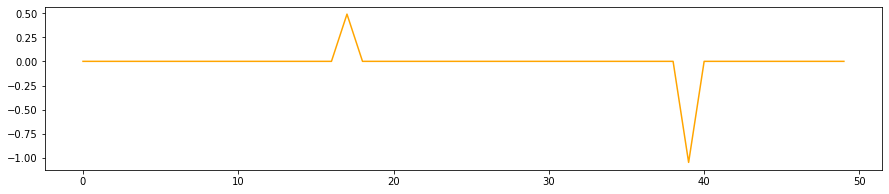

In [13]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

plt.show()

In [14]:
def signum_generation(signal_array, sensitivity = 1.5):
    out_arr = np.empty(0)
    std = np.std(signal_array)
    for i in signal_array:
        append_val = 0
        if (i > std*sensitivity):
            append_val = 100
        elif (i < -std*sensitivity):
            append_val = -100
        out_arr = np.append(out_arr, append_val)
    return out_arr

In [15]:
start = time.time()
signum_gen = signum_generation(sign_gen)
end = time.time()
print(signum_gen)
signum_time = end - start

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.  100.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0. -100.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.]


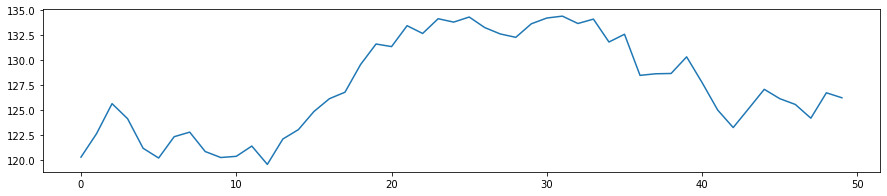

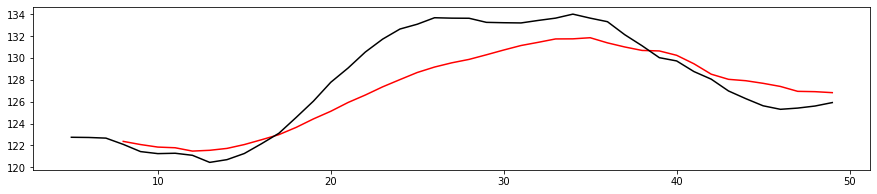

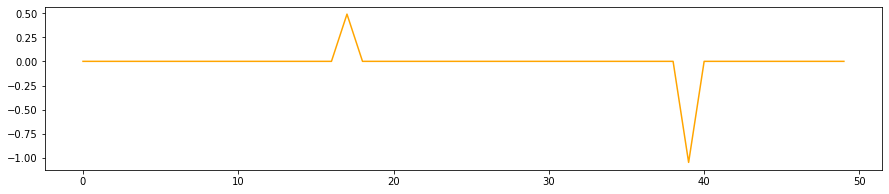

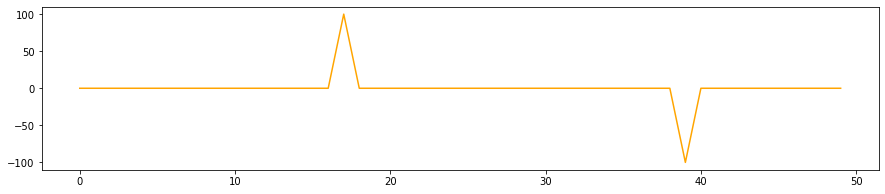

In [16]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

plt.show()

In [17]:
def current_bias(signal_array, signum_array):
    bias = 0
    bias_list = []
    for i,j in zip(signal_array,signum_array):
        if (bias == 0):
            if (j == 100):
                bias = 100
            elif(j == -100):
                bias = -100
        elif(bias == -100):
            if (j == 100 and i > 0):
                bias = 100
            elif(j != 100 and i > 0):
                bias = 0
        elif(bias == 100):
            if (j == -100 and i < 0):
                bias = -100
            elif (j != -100 and i < 0):
                bias = 0
        bias_list.append(bias)
    bias_array = np.array(bias_list)
    return bias_array

In [18]:
start = time.time()
bias_array = current_bias(signal_array = sign_gen, signum_array = signum_gen)
end = time.time()
bias_time = end - start
print(bias_array)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  100  100  100  100  100  100  100  100  100  100  100
  100  100  100  100  100  100  100  100  100  100  100 -100 -100 -100
 -100 -100 -100 -100 -100 -100 -100 -100]


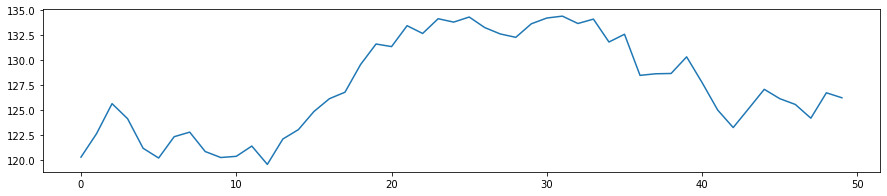

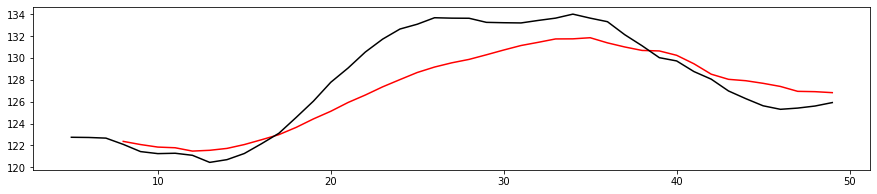

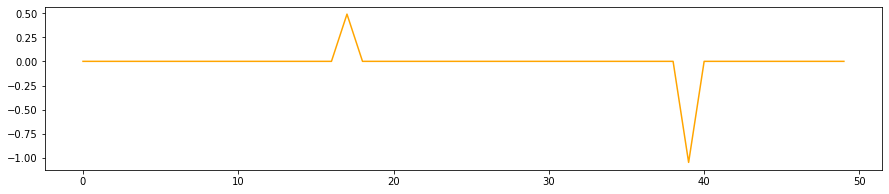

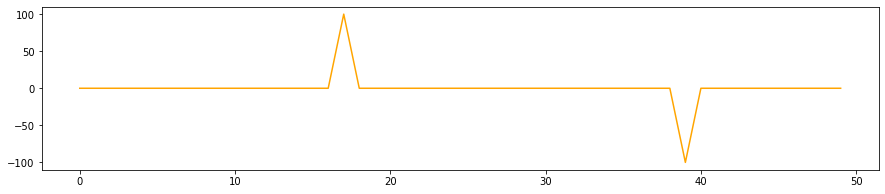

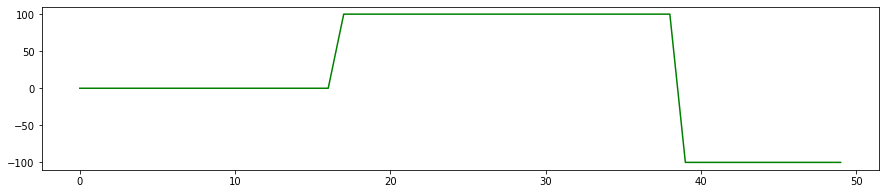

In [19]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

plt.show()

In [20]:
def efficacy_generator (price_array,signum_array, bias_array, stop_loss_percent = 0.3):
    long_book = [0 for i in range(price_array.size)]
    short_book = [0 for i in range(price_array.size)]
    long_pos = []
    short_pos = []
    long_positions = []
    short_positions = []
    long_cash = 0
    short_cash = 0
    stop_loss_flag = False
    short_position_flag = False
    long_position_flag = False
    sub_stop = (max(price_array) - min(price_array))*stop_loss_percent
    
    ctr = 0
    for i,j,k in zip(price_array, bias_array,signum_array):
        if (stop_loss_flag):
            if(k == 100 or k == -100):
                stop_loss_flag = False                 
        elif (stop_loss_flag == False  and short_position_flag == False and long_position_flag == False):
            if(j == 100):
                long_position_flag = True
                long_pos.append(i)
                long_book[ctr] = i
            elif(j == -100):
                short_position_flag = True
                short_pos.append(i)
                short_book[ctr] = i
        elif(stop_loss_flag == False  and short_position_flag == True):
            short_pos.append(i)
            short_book[ctr] = i
            if (i > (min(short_pos) + sub_stop)):
                short_position_flag = False
                stop_loss_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 100):
                short_position_flag = False
                long_position_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 0):
                short_position_flag = False
                short_positions.append(short_pos)
                short_pos = []
        elif(stop_loss_flag == False and long_position_flag == True):
            long_pos.append(i)
            long_book[ctr] = i
            if (i < (max(long_pos) - sub_stop)):
                long_position_flag = False
                stop_loss_flag = True
                long_positions.append(long_pos)
                long_pos = []
            elif (j == 0):
                long_position_flag = False
                long_positions.append(long_pos)
                long_pos = []
            elif(j == -100):
                long_position_flag = False
                short_position_flag = True
                long_positions.append(long_pos)
                long_pos = []
                
        ctr += 1
        
    if (long_pos != []):
        long_positions.append(long_pos)
    if (short_pos != []):
        short_positions.append(short_pos)
    
    for i in long_positions:
        long_cash += (i[-1] - i[0])
    for i in short_positions:
        short_cash += (i[0] - i[-1])
    
    out = (long_cash+short_cash)/sub_stop
    print(out)
    return long_book,short_book

In [21]:
start = time.time()
test = efficacy_generator(price_array = price_list, signum_array = signum_gen, bias_array = bias_array)
end = time.time()
efficacy_time = end - start
print(test)

0.7186030893216975
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 126.77, 129.54, 131.61, 131.35, 133.45, 132.67, 134.15, 133.81, 134.32, 133.26, 132.62, 132.28, 133.64, 134.22, 134.41, 133.67, 134.11, 131.81, 132.59, 128.46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 127.73, 124.98, 123.22, 125.13, 127.06, 126.12, 125.54, 124.16, 126.71, 126.21])


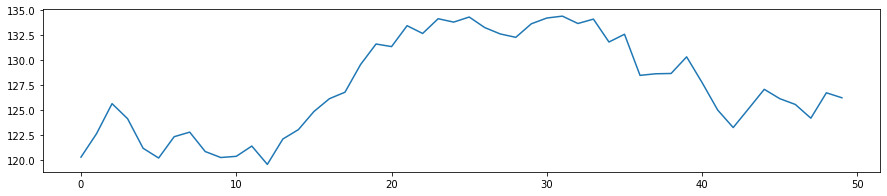

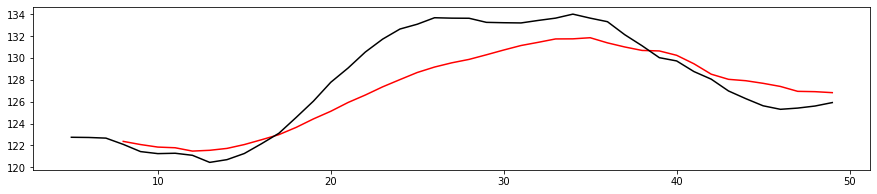

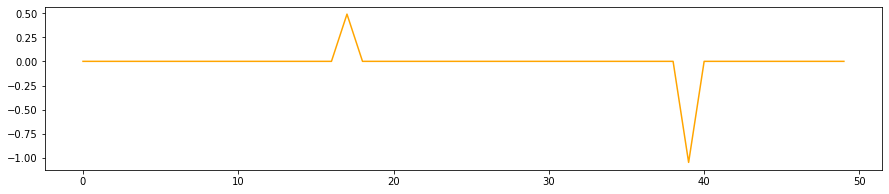

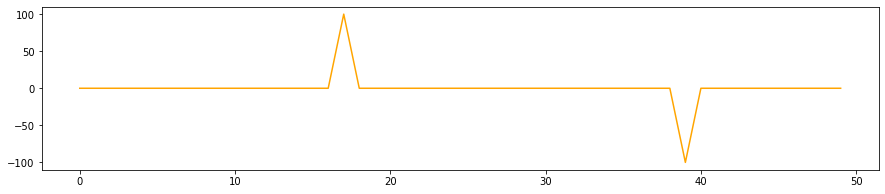

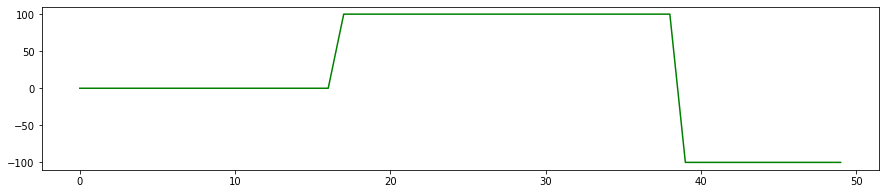

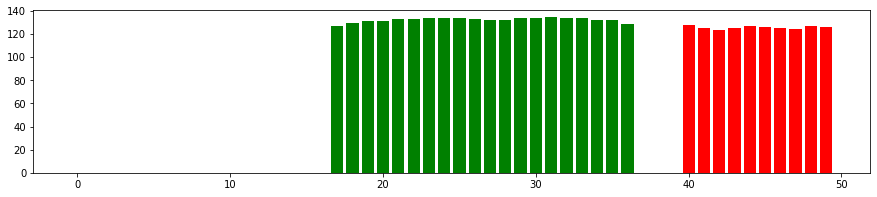

In [22]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

figure(figsize=(plot_width, plot_length))
ax6 = plt.subplot()
plt.bar(np.arange(bias_array.size), test[0], color = 'green')
plt.bar(np.arange(bias_array.size), test[1], color = 'red')

plt.show()

In [23]:
print(
    "Diagnostics \n" +
    "Function Load Time: " + str(function_time) + "\n" + 
    "Oscillator Load Time: " + str(oscillator_time) + "\n" + 
    "Signal Load Time: " + str(signal_time) + "\n" + 
    "Signum Load Time: " + str(signum_time) + "\n" 
    "Bias Load Time: " + str(bias_time) + "\n" + 
    "Efficacy Value Load time: " + str(efficacy_time) + "\n"
    "Total Time: " + str(function_time+oscillator_time+signal_time+signum_time+bias_time+efficacy_time)
    )

Diagnostics 
Function Load Time: 0.010997772216796875
Oscillator Load Time: 0.00899815559387207
Signal Load Time: 0.0019969940185546875
Signum Load Time: 0.002997159957885742
Bias Load Time: 0.0
Efficacy Value Load time: 0.001996278762817383
Total Time: 0.026986360549926758
